# RSNA Pneumonia Detection Challenge

 building an algorithm that automatically detects potential pneumonia cases using Pytorch Lightning

**About Challenge:** The competition challenges us to create an algorithm that can detect lung opacities on chest radiographs to aid in the accurate diagnosis of pneumonia, which is responsible for many deaths of children under 5 and emergency room visits in the US. Diagnosing pneumonia is difficult because other lung conditions and factors can cause increased opacity on the radiograph. CXRs are commonly used but their interpretation can be complicated and time-consuming, making an automated solution helpful in improving the efficiency and reach of diagnostic services. The Radiological Society of North America (RSNA®) has collaborated with Kaggle's machine learning community, the US National Institutes of Health, The Society of Thoracic Radiology, and MD.ai to create a dataset for this challenge.

**About Dataset:** This is an update to a two-stage machine learning challenge to develop an algorithm that detects pneumonia in medical images by automatically locating lung opacities on chest radiographs. The dataset contains training and test images in DICOM format, along with training labels that include bounding boxes for pneumonia and a binary target column indicating whether evidence of pneumonia is present. Competitors are expected to predict bounding boxes for areas of the lung where pneumonia is present. The file format for predictions should include confidence, x-min, y-min, width, and height values, and there should be only one predicted row per image.

The dataset for this challenge consists of chest radiographs in DICOM format. The training set contains a total of 26,684 images, which includes both the images from the stage 1 train set and the new stage 2 train set. The stage 2 test set contains 3,640 new, unseen images.




## Importing Necessary Libraries and reading files

In [1]:
from pathlib import Path
import pydicom
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# reading labels data
labels = pd.read_csv("/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [3]:
# defining the root path to importing images and files and save path to save the models and images
ROOT_PATH = Path("/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/")
SAVE_PATH = Path("/kaggle/working/")

Now, we are going to generate a 3x3 grid of subplots, where each subplot displays a chest X-ray image from the training set along with its associated label. Where label 0 indicating no Pneumonia and 1 indicating there is some evidence of Pneuomia.

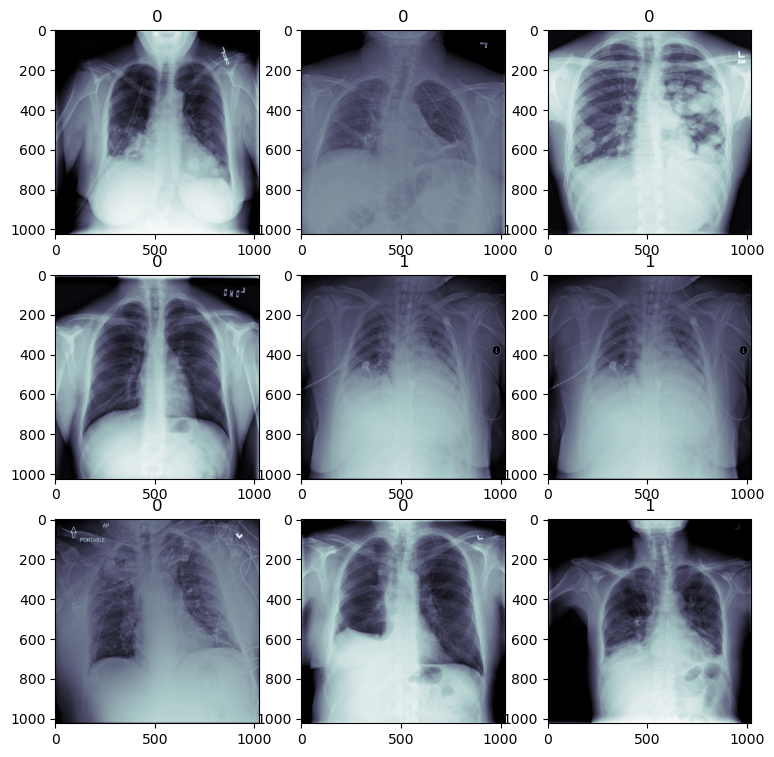

In [4]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
c = 0
for i in range(3):
    for j in range(3):
        patient_id = labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        label = labels['Target'].iloc[c]
        
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c += 1